# ML Reference Materials

# Data Visualization with 3D charts 

We're going to develop a 3d plot in this section. Note we have to import some extra libs and utilities for this section. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add support for 3d plot
from mpl_toolkits.mplot3d.axes3d import Axes3D

# add support for colormaps 
from matplotlib import cm

# add additional mathematical support
from sympy import symbols, diff
from math import log

%matplotlib inline

The function weare going to model can be written in two forms, its natural form and a simplified form.


## $f(x, y) = \frac{1}{3^ {-x^2 - y^2} + 1}$

## $f(x,y) = \frac{1}{r + 1}$  

where $r$ is $3^{-x2 - y^2}$

In [2]:
# Lets define the mathematical function 
# in python. NOte the use of `r` for 
# simplification and readability. 

def f(x,y): 
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [3]:
# Uses linspace to geneate some sample working data.
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)

In [4]:
# 3D plots cannot work with single dimension data so
# we need to make the data multi-dimensional and we 
# can use the numpy meshgrid function to make our
# x & y two dimensional. 
x, y = np.meshgrid(x,y)

## Generate a 3D plot 

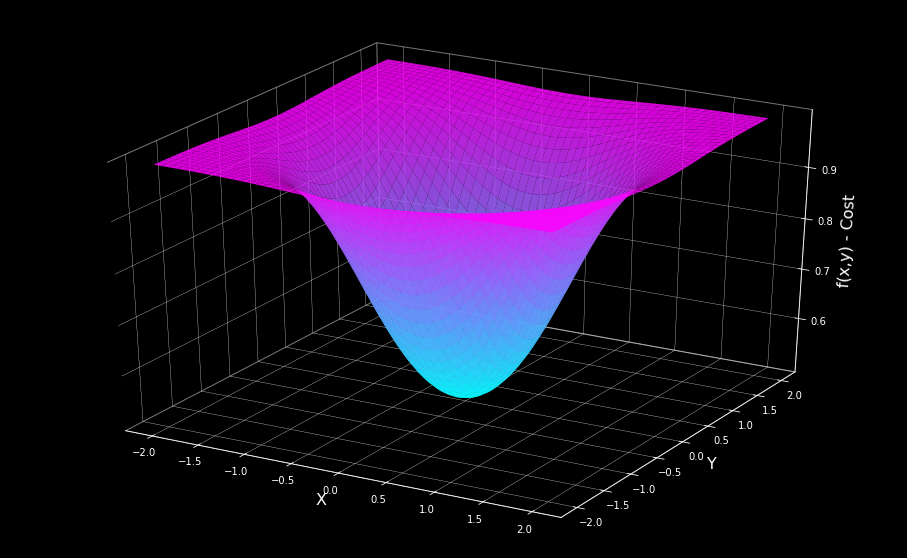

In [5]:
# set the overall plotting style 
plt.style.use('dark_background')

# set the figure and ax values 
fig = plt.figure(figsize=[16,10])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('f(x,y) - Cost', fontsize=16)

# set the plots grid styling
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# reduce the default plot linewidths as they
# are quite stark and unpleasant in a dark
# background setting. 
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3

ax.plot_surface(x, y, f(x, y), cmap=cm.cool, alpha=0.85);

## Partial Derivatives & Symbolic computation

### $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}} { \left(3^{-x^2 - y^2} +1 \right)^2 }$

### $\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}} { \left(3^{-x^2 - y^2} +1 \right)^2 }$

In [6]:
a, b = symbols('x, y')
f(a,b)

1/(3**(-x**2 - y**2) + 1)

In [7]:
print('Cost function f(x,y) :', f(a,b))
print('Partial derivative  wrt x:',diff(f(a,b), a))

Cost function f(x,y) : 1/(3**(-x**2 - y**2) + 1)
Partial derivative  wrt x: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [8]:
# evaluate the cost function
print('Value of f(x,y) at x=1.8, y=1.0 is:', f(a,b).evalf(subs={a:1.8, b:1.0}))

Value of f(x,y) at x=1.8, y=1.0 is: 0.990604794032582


In [9]:
# evaluating the partial derivative
print('Value of partial derivative with respect to x is:', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Value of partial derivative with respect to x is: 0.0368089716197505


## Batch Gradient Descent with Sympy

In [10]:
# setup 
multiplier = 0.1
max_iter = 500

In [11]:
# initial guess 
params = np.array([1.8, 1.0]) 

for n in range(max_iter):
    # work out the slope 
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients  # params = params - learningRate * slopes 

# results 
print('Values in gradient array', gradients)
print('minimum occurs at x value of: ', params[0])
print('minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
minimum occurs at x value of:  3.45838599885832e-11
minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


### Partial derivative functions in Python 

In [12]:
# partial derivative function for x
def fpx(x, y):
    r = 3** (-x**2 - y**2)
    return 2*x*log(3)*r / (r +1)**2

In [13]:
# partial derivative function for y
def fpy(x, y):
    r = 3** (-x**2 - y**2)
    return 2*y*log(3)*r / (r +1)**2

In [14]:
fpx(1.8, 1.0)

0.036808971619750504

In [15]:
# copy of above, but changed to use the `fpx` and `fpy` funcs instead of `sympy`
# initial guess 
params = np.array([1.8, 1.0]) 

for n in range(max_iter):
    # work out the slope 
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients  # params = params - learningRate * slopes 

# results 
print('Values in gradient array', gradients)
print('minimum occurs at x value of: ', params[0])
print('minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
minimum occurs at x value of:  3.458385998858304e-11
minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


#### Summary

You might not want to use the sympy lib in a loop with high iteration values based on the performance. You can see from the sample above there is a considerable difference in perfoamce between the sympy and pure python examples.

## Graphing 3D Gradient Descent

In [26]:
# copied from above

# setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) 
vals_arr = params.reshape(1,2)

for n in range(max_iter):
    # work out the slope 
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients  # params = params - learningRate * slopes 
    vals_arr = np.append(vals_arr, params.reshape(1,2), axis=0)

# results 
print(vals_arr.shape)
print('Values in gradient array', gradients)
print('minimum occurs at x value of: ', params[0])
print('minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


(501, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
minimum occurs at x value of:  3.458385998858304e-11
minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


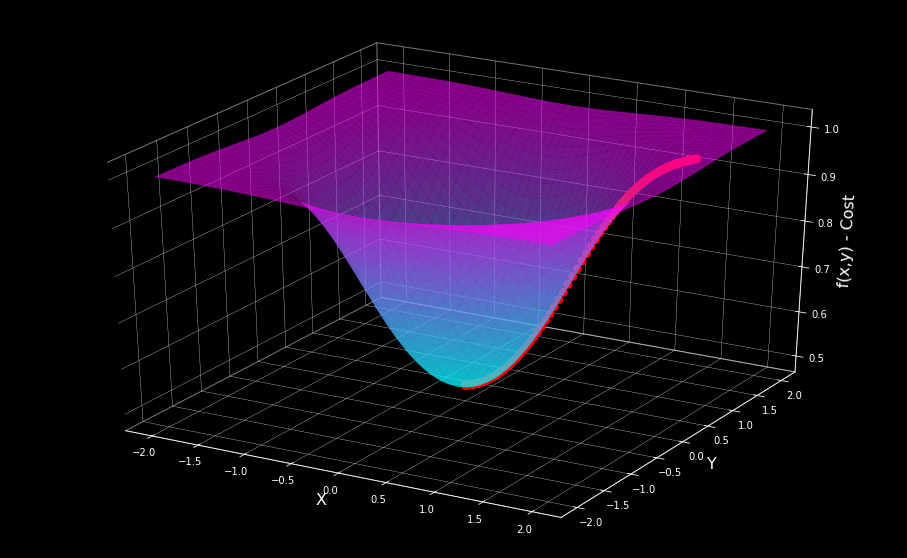

In [38]:
# new plot 

# set the overall plotting style 
plt.style.use('dark_background')

# set the figure and ax values 
fig = plt.figure(figsize=[16,10])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('f(x,y) - Cost', fontsize=16)

# set the plots grid styling
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# reduce the default plot linewidths as they
# are quite stark and unpleasant in a dark
# background setting. 
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3

ax.plot_surface(x, y, f(x, y), cmap=cm.cool, alpha=0.55)
ax.scatter(vals_arr[:, 0], vals_arr[:, 1], f(vals_arr[:,0], vals_arr[:,1]), s=60, color='r', alpha=1.0);